<a href="https://colab.research.google.com/github/bulatych/ML_HSE/blob/main/homeworks/HW_5_(Classification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First of all, a few notes:
* This work is a sequel to the previous homework assignment (HW-4 ENCODE).
* It is assumed that in HW-4 you successeeded in data processing of ChIP-seq and ATAC-seq experiments. If you failed to do so or just didn't have time to complete HW-4, please contact me in Telegram, I will give data you can work with in this homework.
* Comment and describe! To give you a high grade, we need to understand that you interpreted all results correctly.

Remember to submit the feedback! Especially if the homework was too difficult or easy for you.

A cat image to get you throught this homework:

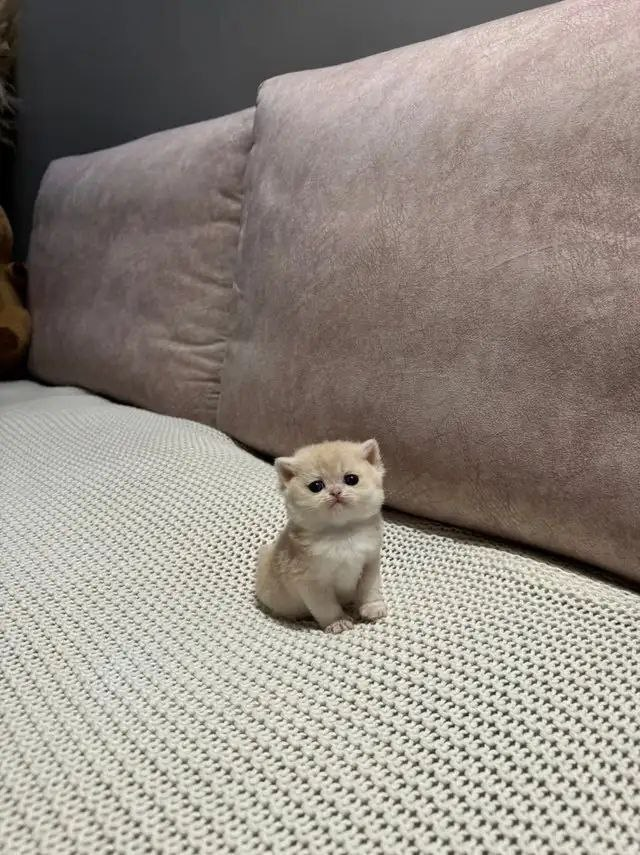

<font color=#c30>**Now you are ready.**</font>

# Introduction

## Target transcription factors

In HW-4, you were asked to choose three ChIP-seq experiments and one ATAC-seq experiment from some cell line. Please list the names of TFs and the cell line.

* Cell line:
* TF-1:
* TF-2:
* TF-3:





<font color=#c30>**[0.5]**</font> Load your data and make train/test split.

Make sure that after this section, you have the following:
* `Xtrain`/`Xtest` - table with k-mers, features for our sequences
* `Ytrain`/`Ytest` - table with 4 one-hot-encoded columns, one for each class (background + 3 TFs)

Also, some asserts for you to check if everything is fine with your dataset.

In [15]:
df

,C,A,G,T,CA,AG,GT,TC,CC,CT,...,TAATC,TCATA,AGCTA,CTATT,TAACG,TAGTG,TCAAT,ATAAT,CGTAC,ACGTA
0,0.381228,0.098494,0.400927,0.119351,0.041763,0.045244,0.044084,0.056845,0.134571,0.058005,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
1,0.299838,0.228525,0.282010,0.189627,0.074675,0.099026,0.034091,0.068182,0.113636,0.097403,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
2,0.329268,0.158537,0.313415,0.198780,0.050061,0.056166,0.034188,0.067155,0.109890,0.083028,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
3,0.177536,0.173913,0.417572,0.230978,0.045331,0.106981,0.086129,0.050771,0.021759,0.064370,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
4,0.373167,0.135630,0.379032,0.112170,0.051357,0.068232,0.028613,0.042553,0.142333,0.057227,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13995,0.090909,0.227273,0.500000,0.181818,0.000000,0.190476,0.095238,0.047619,0.000000,0.095238,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
13996,0.273148,0.199074,0.356481,0.171296,0.069767,0.079070,0.055814,0.065116,0.083721,0.041860,...,0.0,0.004717,0.0,0.0,0.0,0.004717,0.0,0.0,0.0,0.000000
13997,0.417722,0.105485,0.185654,0.291139,0.067797,0.050847,0.042373,0.173729,0.165254,0.173729,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
13998,0.188679,0.240566,0.339623,0.231132,0.052133,0.099526,0.042654,0.061611,0.014218,0.071090,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000


In [7]:

import pandas as pd
df = pd.read_csv('transcription_factors_kmer.csv')
Y = df['Class'].values
features = df.columns.values
X = df.values
# Проверка уникальных значений в Class
print(df['Class'].unique())
df.isna().sum().sum()
df = pd.DataFrame(df).fillna(0)

[0 1 2 3]


In [8]:
assert df['Class'].nunique() == 4, "Something is wrong with the number of your classes"
# Ignore below if you have different maximum length of k-mers
assert df.shape[1] == 1365, "Do you have 1364 columns for k-mers and 1 for class?"
assert (df.drop(['Class'], axis=1).dtypes == 'float64').sum() == 1364, "Some of k-mer columns are not float values"
assert (df['Class'].dtype == 'int64') == True, "Your class column have non-integer values"

In [14]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(
    X, Y, test_size= 0.3, random_state=123
)

print("Train:")
print(f"\tX: {Xtrain.shape}; Y: {Ytrain.shape}")
print("Test:")
print(f"\tX: {Xtest.shape}; Y: {Ytest.shape}")

Train:
	X: (9800, 1365); Y: (9800,)
Test:
	X: (4200, 1365); Y: (4200,)


In [13]:
# assert Xtrain.shape[0] == Ytrain.shape[0], "Mismatch between X_train and Y_train"
# assert Xtest.shape[0] == Ytest.shape[0], "Mismatch between X_test and Y_test"
# assert Xtrain.shape[1] > 0, "X_train should have features"
# assert Ytrain.shape[1] == 4, "Y_train should have 4 classes (background + 3 TFs)"

IndexError: tuple index out of range

## Model training <font color=#c30>**[5]**</font>

Time to train our fit-predict skills!

<font color=#c30>**[0.5]**</font> Select proper target metric(s). Do you want to use micro- or macro-averaging? Justify your choice.

<font color=#c30>**[1]**</font> Make sure you understand your multiclassification strategy. Briefly explain differences between One-Vs-Rest (One-Vs-All) and One-Vs-One strategies. Does every model from the list below supports multiclass classification, or do you need to wrap something into multiclass wrappers (OVR/OVO)? Check the links below for more info.

  * <font color=#c30>**[ ! ]**</font> In the context of our task, we are working with **Multiclass classification**, NOT multilabel classification! (Make sure you understand the difference)

  * <font color=#c30>**[ ! ]**</font> For the sake of simplicity, choose One-Vs-Rest strategy.

  * Which models support multiclass classification: https://scikit-learn.org/1.5/modules/multiclass.html
  * OVO wrapper if you need it: https://scikit-learn.org/1.5/modules/generated/sklearn.multiclass.OneVsOneClassifier.html
  * OVR wrapper if you need it: https://scikit-learn.org/1.5/modules/generated/sklearn.multiclass.OneVsRestClassifier.html



Your answer:

<font color=#c30>**[3]**</font> Train and optimize hyperparameters for the following models:
  * Logistic regression
  * KNN
  * Decision tree
  * Random Forest
  * (Optional) SVM
  * (Optional) Any Gradient Boosting implementation

  * <font color=#c30>**[ ! ]**</font> Take note that algoritmhs like SVM with nonlinear kernel will take A LOT OF TIME to train. During long calculcations, Google Colab might drop your session and you will lose your progress. To counter it, either subsample your data, make smaller grid or skip the algorithm completely (just don't delete the cell with the code and it's output).



In [24]:
# Логистическая регрессия
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
import numpy as np
# Определение параметров для GridSearch
param_grid = {
    'C': [0.1, 0.5, 1],  # Регуляризация
    'solver': ['saga'], # Алгоритмы оптимизации
    'penalty': ['l2', 'elasticnet'], # Выбираем тип регуляризации L2 и elasticnet
    'l1_ratio' : [0.5]
}

# Определение модели логистической регрессии
model_logr = LogisticRegression(multi_class='ovr', max_iter=1000, n_jobs=-1)
# Инициализация GridSearchCV
grid_search = GridSearchCV(model_logr, param_grid,
                           scoring='f1_micro', cv=3)

grid_search.fit(Xtrain, Ytrain)

# Вывод лучших параметров и лучшего значения f1_micro
print("Лучшие параметры:", grid_search.best_params_)
print("Лучший f1_micro:", grid_search.best_score_)

# Прогнозирование на тестовой выборке с использованием лучшей модели
best_model = grid_search.best_estimator_
Ypred = best_model.predict(Xtest)

# Оценка модели
print("Confusion matrix:\n", confusion_matrix(Ytest, Ypred))
print("\nОтчет о классификации:\n", classification_report(Ytest, Ypred))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-pac

Лучшие параметры: {'C': 0.1, 'l1_ratio': 0.5, 'penalty': 'elasticnet', 'solver': 'saga'}
Лучший f1_micro: 0.9743870256312498
Confusion matrix:
 [[2427    0    0    0]
 [   0  515   87    0]
 [   0   34  541    0]
 [   0    0    0  596]]

Отчет о классификации:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2427
           1       0.94      0.86      0.89       602
           2       0.86      0.94      0.90       575
           3       1.00      1.00      1.00       596

    accuracy                           0.97      4200
   macro avg       0.95      0.95      0.95      4200
weighted avg       0.97      0.97      0.97      4200



In [26]:
# KNN алгоритм
from sklearn.neighbors import KNeighborsClassifier

# Определение параметров для GridSearch
param_grid = {
    'n_neighbors': [3, 5, 7, 10],  # Количество соседей
    'weights': ['uniform', 'distance'],  # Метод взвешивания
    'metric': ['euclidean', 'manhattan']  # Метрики расстояния
}

# Определение модели KNN
model_knn = KNeighborsClassifier()

# Инициализация GridSearchCV
grid_search_knn = GridSearchCV(model_knn, param_grid,
                                scoring='f1_micro', cv=3)

# Обучение модели
grid_search_knn.fit(Xtrain, Ytrain)

# Вывод лучших параметров и лучшего значения f1_micro
print("Лучшие параметры для KNN:", grid_search_knn.best_params_)
print("Лучший f1_micro для KNN:", grid_search_knn.best_score_)

# Прогнозирование на тестовой выборке с использованием лучшей модели
best_knn_model = grid_search_knn.best_estimator_
Ypred_knn = best_knn_model.predict(Xtest)

# Оценка модели
print("Confusion matrix для KNN:\n", confusion_matrix(Ytest, Ypred_knn))
print("\nОтчет о классификации для KNN:\n", classification_report(Ytest, Ypred_knn))


Лучшие параметры для KNN: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
Лучший f1_micro для KNN: 1.0
Confusion matrix для KNN:
 [[2427    0    0    0]
 [   0  602    0    0]
 [   0    0  575    0]
 [   0    0    0  596]]

Отчет о классификации для KNN:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2427
           1       1.00      1.00      1.00       602
           2       1.00      1.00      1.00       575
           3       1.00      1.00      1.00       596

    accuracy                           1.00      4200
   macro avg       1.00      1.00      1.00      4200
weighted avg       1.00      1.00      1.00      4200



In [28]:
# Алгоритм дерево решений
from sklearn.tree import DecisionTreeClassifier

# Определение параметров для GridSearch
param_grid_dt = {
    'criterion': ['gini', 'entropy'],  # Критерий, используемый для разбиения
    'max_depth': [None, 5, 10, 15],     # Максимальная глубина дерева
    'min_samples_split': [2, 5, 10],    # Минимальное количество образцов для разбиения
    'min_samples_leaf': [1, 2, 4]       # Минимальное количество образцов на листе
}

# Определение модели Decision Tree
model_dt = DecisionTreeClassifier()

# Инициализация GridSearchCV с оценкой macro average F1-меры
grid_search_dt = GridSearchCV(model_dt, param_grid_dt,
                               scoring='f1_macro', cv=3)

# Обучение модели
grid_search_dt.fit(Xtrain, Ytrain)

# Вывод лучших параметров и лучшего значения macro F1
print("Лучшие параметры для Decision Tree:", grid_search_dt.best_params_)
print("Лучший macro F1 для Decision Tree:", grid_search_dt.best_score_)

# Прогнозирование на тестовой выборке с использованием лучшей модели
best_dt_model = grid_search_dt.best_estimator_
Ypred_dt = best_dt_model.predict(Xtest)

# Оценка модели
print("Confusion matrix для Decision Tree:\n", confusion_matrix(Ytest, Ypred_dt))
print("\nОтчет о классификации для Decision Tree:\n", classification_report(Ytest, Ypred_dt))

Лучшие параметры для Decision Tree: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Лучший macro F1 для Decision Tree: 1.0
Confusion matrix для Decision Tree:
 [[2427    0    0    0]
 [   0  602    0    0]
 [   0    0  575    0]
 [   0    0    0  596]]

Отчет о классификации для Decision Tree:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2427
           1       1.00      1.00      1.00       602
           2       1.00      1.00      1.00       575
           3       1.00      1.00      1.00       596

    accuracy                           1.00      4200
   macro avg       1.00      1.00      1.00      4200
weighted avg       1.00      1.00      1.00      4200



In [29]:
# Алгоритм случайные деревья

from sklearn.ensemble import RandomForestClassifier

# Определение параметров для GridSearch
param_grid_rf = {
    'n_estimators': [50, 100, 200],      # Количество деревьев в лесу
    'max_features': ['auto', 'sqrt'],    # Количество признаков, используемых для разбиения
    'max_depth': [None, 5, 10, 15],       # Максимальная глубина дерева
    'min_samples_split': [2, 5, 10]       # Минимальное количество образцов для разбиения
}

# Определение модели Random Forest
model_rf = RandomForestClassifier()

# Инициализация GridSearchCV с оценкой macro average F1-меры
grid_search_rf = GridSearchCV(model_rf, param_grid_rf,
                               scoring='f1_macro', cv=3)

# Обучение модели
grid_search_rf.fit(Xtrain, Ytrain)

# Вывод лучших параметров и лучшего значения macro F1
print("Лучшие параметры для Random Forest:", grid_search_rf.best_params_)
print("Лучший macro F1 для Random Forest:", grid_search_rf.best_score_)

# Прогнозирование на тестовой выборке с использованием лучшей модели
best_rf_model = grid_search_rf.best_estimator_
Ypred_rf = best_rf_model.predict(Xtest)

# Оценка модели
print("Confusion matrix для Random Forest:\n", confusion_matrix(Ytest, Ypred_rf))
print("\nОтчет о классификации для Random Forest:\n", classification_report(Ytest, Ypred_rf))

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
108 fits failed out of a total of 216.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
108 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

Лучшие параметры для Random Forest: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 200}
Лучший macro F1 для Random Forest: 0.8788245831549045
Confusion matrix для Random Forest:
 [[2382   34   11    0]
 [   1  561   39    1]
 [   3   66  460   46]
 [  23   17   33  523]]

Отчет о классификации для Random Forest:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      2427
           1       0.83      0.93      0.88       602
           2       0.85      0.80      0.82       575
           3       0.92      0.88      0.90       596

    accuracy                           0.93      4200
   macro avg       0.90      0.90      0.90      4200
weighted avg       0.94      0.93      0.93      4200



<font color=#c30>**[0.5]**</font> Justify the parameters grid for each model. What number of cross-validation folds did you use? Why?

Your answer:

## Interpretation <font color=#c30>**[3.5]**</font>

<font color=#c30>**[0.75]**</font> Use test set to rank optimized models. Describe and interpret results.

In [32]:
from sklearn.metrics import classification_report, accuracy_score, f1_score

# Предположим, что у вас уже есть обученные модели и тестовые данные
# models должен быть yня
models = {
    'KNN': best_knn_model,          # Модель KNN
    'Decision Tree': best_dt_model, # Модель Decision Tree
    'Random Forest': best_rf_model,   # Модель Random Forest
    'Logistic Regression' : best_model # Модель логистическая регрессия
}

# Переменная для хранения результатов
results = {}

for model_name, model in models.items():
    # Прогнозируем классы для тестового набора
    Ypred = model.predict(Xtest)

    # Оцениваем производительность модели
    accuracy = accuracy_score(Ytest, Ypred)
    f1_micro = f1_score(Ytest, Ypred, average='micro')
    f1_macro = f1_score(Ytest, Ypred, average='macro')

    # Сохраняем результаты
    results[model_name] = {
        'Accuracy': accuracy,
        'F1 Micro': f1_micro,
        'F1 Macro': f1_macro,
        'Classification Report': classification_report(Ytest, Ypred)
    }

# Печатаем результаты
for model_name, metrics in results.items():
    print(f"Результаты для {model_name}:")
    print(f"    Accuracy: {metrics['Accuracy']:.2f}")
    print(f"    F1 Micro: {metrics['F1 Micro']:.2f}")
    print(f"    F1 Macro: {metrics['F1 Macro']:.2f}")
    print("\n    Classification Report:\n", metrics['Classification Report'])

# Индексация по метрикам
sorted_results = sorted(results.items(), key=lambda x: x[1]['F1 Macro'], reverse=True)
print("\nРейтинг моделей по F1 Macro:")
for model_name, metrics in sorted_results:
    print(f"{model_name}: F1 Macro = {metrics['F1 Macro']:.2f}, Accuracy = {metrics['Accuracy']:.2f}")

Результаты для KNN:
    Accuracy: 1.00
    F1 Micro: 1.00
    F1 Macro: 1.00

    Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2427
           1       1.00      1.00      1.00       602
           2       1.00      1.00      1.00       575
           3       1.00      1.00      1.00       596

    accuracy                           1.00      4200
   macro avg       1.00      1.00      1.00      4200
weighted avg       1.00      1.00      1.00      4200

Результаты для Decision Tree:
    Accuracy: 1.00
    F1 Micro: 1.00
    F1 Macro: 1.00

    Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2427
           1       1.00      1.00      1.00       602
           2       1.00      1.00      1.00       575
           3       1.00      1.00      1.00       596

    accuracy                           1.00      4200
   macro avg     

In [33]:
# Логистическая регрессия
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
import numpy as np
# Определение параметров для GridSearch
param_grid = {
    'C': [0.1, 0.5, 1],  # Регуляризация
    'solver': ['saga'], # Алгоритмы оптимизации
    'penalty': ['l2', 'elasticnet'], # Выбираем тип регуляризации L2 и elasticnet
    'l1_ratio' : [0.5]
}

# Определение модели логистической регрессии
model_logr = LogisticRegression(multi_class='ovr', max_iter=1000, n_jobs=-1)
# Инициализация GridSearchCV
grid_search = GridSearchCV(model_logr, param_grid,
                           scoring='f1_macro', cv=3)

grid_search.fit(Xtrain, Ytrain)

# Вывод лучших параметров и лучшего значения f1_micro
print("Лучшие параметры:", grid_search.best_params_)
print("Лучший f1_macro:", grid_search.best_score_)

# Прогнозирование на тестовой выборке с использованием лучшей модели
best_model = grid_search.best_estimator_
Ypred = best_model.predict(Xtest)

# Оценка модели
print("Confusion matrix:\n", confusion_matrix(Ytest, Ypred))
print("\nОтчет о классификации:\n", classification_report(Ytest, Ypred))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-pac

Лучшие параметры: {'C': 0.1, 'l1_ratio': 0.5, 'penalty': 'elasticnet', 'solver': 'saga'}
Лучший f1_macro: 0.9554339988974259
Confusion matrix:
 [[2427    0    0    0]
 [   0  515   87    0]
 [   0   34  541    0]
 [   0    0    0  596]]

Отчет о классификации:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2427
           1       0.94      0.86      0.89       602
           2       0.86      0.94      0.90       575
           3       1.00      1.00      1.00       596

    accuracy                           0.97      4200
   macro avg       0.95      0.95      0.95      4200
weighted avg       0.97      0.97      0.97      4200



In [34]:
# KNN алгоритм
from sklearn.neighbors import KNeighborsClassifier

# Определение параметров для GridSearch
param_grid = {
    'n_neighbors': [3, 5, 7, 10],  # Количество соседей
    'weights': ['uniform', 'distance'],  # Метод взвешивания
    'metric': ['euclidean', 'manhattan']  # Метрики расстояния
}

# Определение модели KNN
model_knn = KNeighborsClassifier()

# Инициализация GridSearchCV
grid_search_knn = GridSearchCV(model_knn, param_grid,
                                scoring='f1_macro', cv=3)

# Обучение модели
grid_search_knn.fit(Xtrain, Ytrain)

# Вывод лучших параметров и лучшего значения f1_micro
print("Лучшие параметры для KNN:", grid_search_knn.best_params_)
print("Лучший f1_macro для KNN:", grid_search_knn.best_score_)

# Прогнозирование на тестовой выборке с использованием лучшей модели
best_knn_model = grid_search_knn.best_estimator_
Ypred_knn = best_knn_model.predict(Xtest)

# Оценка модели
print("Confusion matrix для KNN:\n", confusion_matrix(Ytest, Ypred_knn))
print("\nОтчет о классификации для KNN:\n", classification_report(Ytest, Ypred_knn))

Лучшие параметры для KNN: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
Лучший f1_macro для KNN: 1.0
Confusion matrix для KNN:
 [[2427    0    0    0]
 [   0  602    0    0]
 [   0    0  575    0]
 [   0    0    0  596]]

Отчет о классификации для KNN:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2427
           1       1.00      1.00      1.00       602
           2       1.00      1.00      1.00       575
           3       1.00      1.00      1.00       596

    accuracy                           1.00      4200
   macro avg       1.00      1.00      1.00      4200
weighted avg       1.00      1.00      1.00      4200



In [36]:
# Алгоритм дерево решений
from sklearn.tree import DecisionTreeClassifier

# Определение параметров для GridSearch
param_grid_dt = {
    'criterion': ['gini', 'entropy'],  # Критерий, используемый для разбиения
    'max_depth': [None, 5, 10, 15],     # Максимальная глубина дерева
    'min_samples_split': [2, 5, 10],    # Минимальное количество образцов для разбиения
    'min_samples_leaf': [1, 2, 4]       # Минимальное количество образцов на листе
}

# Определение модели Decision Tree
model_dt = DecisionTreeClassifier()

# Инициализация GridSearchCV с оценкой macro average F1-меры
grid_search_dt = GridSearchCV(model_dt, param_grid_dt,
                               scoring='f1_micro', cv=3)

# Обучение модели
grid_search_dt.fit(Xtrain, Ytrain)

# Вывод лучших параметров и лучшего значения macro F1
print("Лучшие параметры для Decision Tree:", grid_search_dt.best_params_)
print("Лучший micro F1 для Decision Tree:", grid_search_dt.best_score_)

# Прогнозирование на тестовой выборке с использованием лучшей модели
best_dt_model = grid_search_dt.best_estimator_
Ypred_dt = best_dt_model.predict(Xtest)

# Оценка модели
print("Confusion matrix для Decision Tree:\n", confusion_matrix(Ytest, Ypred_dt))
print("\nОтчет о классификации для Decision Tree:\n", classification_report(Ytest, Ypred_dt))

Лучшие параметры для Decision Tree: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Лучший micro F1 для Decision Tree: 1.0
Confusion matrix для Decision Tree:
 [[2427    0    0    0]
 [   0  602    0    0]
 [   0    0  575    0]
 [   0    0    0  596]]

Отчет о классификации для Decision Tree:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2427
           1       1.00      1.00      1.00       602
           2       1.00      1.00      1.00       575
           3       1.00      1.00      1.00       596

    accuracy                           1.00      4200
   macro avg       1.00      1.00      1.00      4200
weighted avg       1.00      1.00      1.00      4200



In [37]:
# Алгоритм случайные деревья

from sklearn.ensemble import RandomForestClassifier

# Определение параметров для GridSearch
param_grid_rf = {
    'n_estimators': [50, 100, 200],      # Количество деревьев в лесу
    'max_features': ['auto', 'sqrt'],    # Количество признаков, используемых для разбиения
    'max_depth': [None, 5, 10, 15],       # Максимальная глубина дерева
    'min_samples_split': [2, 5, 10]       # Минимальное количество образцов для разбиения
}

# Определение модели Random Forest
model_rf = RandomForestClassifier()

# Инициализация GridSearchCV с оценкой macro average F1-меры
grid_search_rf = GridSearchCV(model_rf, param_grid_rf,
                               scoring='f1_micro', cv=3)

# Обучение модели
grid_search_rf.fit(Xtrain, Ytrain)

# Вывод лучших параметров и лучшего значения macro F1
print("Лучшие параметры для Random Forest:", grid_search_rf.best_params_)
print("Лучший micro F1 для Random Forest:", grid_search_rf.best_score_)

# Прогнозирование на тестовой выборке с использованием лучшей модели
best_rf_model = grid_search_rf.best_estimator_
Ypred_rf = best_rf_model.predict(Xtest)

# Оценка модели
print("Confusion matrix для Random Forest:\n", confusion_matrix(Ytest, Ypred_rf))
print("\nОтчет о классификации для Random Forest:\n", classification_report(Ytest, Ypred_rf))

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
108 fits failed out of a total of 216.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
108 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

Лучшие параметры для Random Forest: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 200}
Лучший micro F1 для Random Forest: 0.9326534659441189
Confusion matrix для Random Forest:
 [[2391   26   10    0]
 [   0  551   50    1]
 [   3   68  458   46]
 [  19   17   33  527]]

Отчет о классификации для Random Forest:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2427
           1       0.83      0.92      0.87       602
           2       0.83      0.80      0.81       575
           3       0.92      0.88      0.90       596

    accuracy                           0.94      4200
   macro avg       0.89      0.90      0.89      4200
weighted avg       0.94      0.94      0.94      4200



In [38]:
from sklearn.metrics import classification_report, accuracy_score, f1_score

# Предположим, что у вас уже есть обученные модели и тестовые данные
# models должен быть yня
models = {
    'KNN': best_knn_model,          # Модель KNN
    'Decision Tree': best_dt_model, # Модель Decision Tree
    'Random Forest': best_rf_model,   # Модель Random Forest
    'Logistic Regression' : best_model # Модель логистическая регрессия
}

# Переменная для хранения результатов
results = {}

for model_name, model in models.items():
    # Прогнозируем классы для тестового набора
    Ypred = model.predict(Xtest)

    # Оцениваем производительность модели
    accuracy = accuracy_score(Ytest, Ypred)
    f1_micro = f1_score(Ytest, Ypred, average='micro')
    f1_macro = f1_score(Ytest, Ypred, average='macro')

    # Сохраняем результаты
    results[model_name] = {
        'Accuracy': accuracy,
        'F1 Micro': f1_micro,
        'F1 Macro': f1_macro,
        'Classification Report': classification_report(Ytest, Ypred)
    }

# Печатаем результаты
for model_name, metrics in results.items():
    print(f"Результаты для {model_name}:")
    print(f"    Accuracy: {metrics['Accuracy']:.2f}")
    print(f"    F1 Micro: {metrics['F1 Micro']:.2f}")
    print(f"    F1 Macro: {metrics['F1 Macro']:.2f}")
    print("\n    Classification Report:\n", metrics['Classification Report'])

# Индексация по метрикам
sorted_results = sorted(results.items(), key=lambda x: x[1]['F1 Macro'], reverse=True)
print("\nРейтинг моделей по F1 Macro:")
for model_name, metrics in sorted_results:
    print(f"{model_name}: F1 Macro = {metrics['F1 Macro']:.2f}, Accuracy = {metrics['Accuracy']:.2f}")

Результаты для KNN:
    Accuracy: 1.00
    F1 Micro: 1.00
    F1 Macro: 1.00

    Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2427
           1       1.00      1.00      1.00       602
           2       1.00      1.00      1.00       575
           3       1.00      1.00      1.00       596

    accuracy                           1.00      4200
   macro avg       1.00      1.00      1.00      4200
weighted avg       1.00      1.00      1.00      4200

Результаты для Decision Tree:
    Accuracy: 1.00
    F1 Micro: 1.00
    F1 Macro: 1.00

    Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2427
           1       1.00      1.00      1.00       602
           2       1.00      1.00      1.00       575
           3       1.00      1.00      1.00       596

    accuracy                           1.00      4200
   macro avg     


<font color=#c30>**[0.75]**</font> For the model type of your choice, construct and interpret ROC curves (on the same figure) and calculate ROC AUC for:
  *  each class according to One-Vs-Rest classifier scheme
  *  micro-/macro-averaged OvR

  Use this: https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#plot-all-ovr-roc-curves-together

In [43]:
n_classes = len(np.unique(Y))
n_classes

4

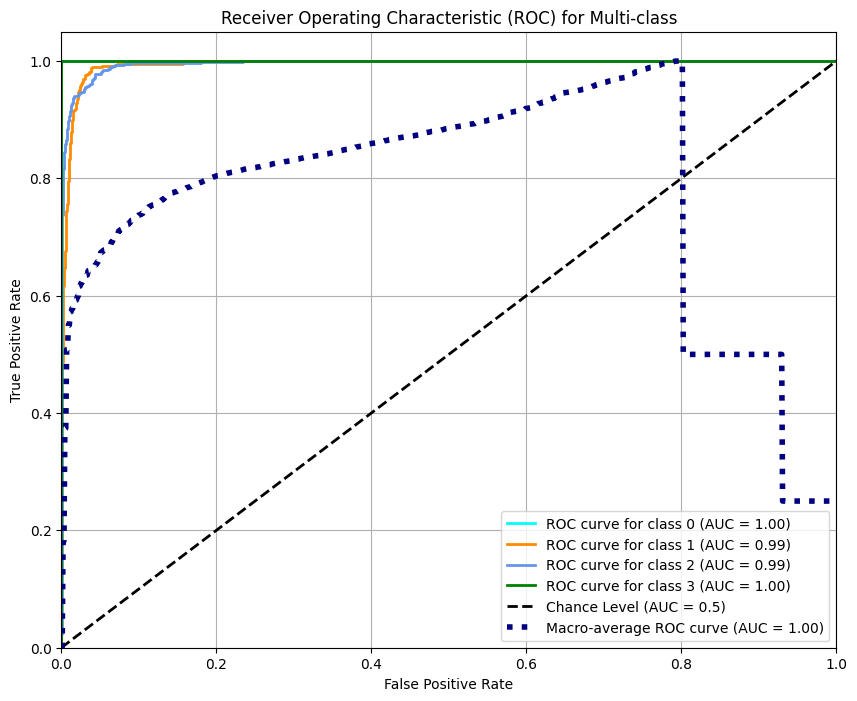

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Бинаризация меток классов
Ytest = label_binarize(Ytest, classes=np.unique(Y))
n_classes = Ytest.shape[1]  # Количество классов

# Получите вероятности от модели
Y_score = model.predict_proba(Xtest)

# Инициализируйте словари для FPR и TPR
fpr = {}
tpr = {}
roc_auc = {}

# Вычисляйте FPR и TPR для каждого класса
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Ytest[:, i], Y_score[:, i])
    roc_auc[i] = roc_auc_score(Ytest[:, i], Y_score[:, i])

# Здесь мы просто будем хранить TPR и FPR каждого класса
all_fpr = []
all_tpr = []

for i in range(n_classes):
    all_fpr.append(fpr[i])
    all_tpr.append(tpr[i])

# Макросредние значения, просто усредняем по классам
mean_tpr = np.zeros_like(all_fpr[0])  # Инициализируем с длиной самого первого массива TPR

# Обходим все классы для вычисления макро TPR
for i in range(n_classes):
    if len(tpr[i]) > len(mean_tpr):  # Если текущий TPR длиннее
        mean_tpr = np.pad(mean_tpr, (0, len(tpr[i]) - len(mean_tpr)), 'constant')
    mean_tpr[:len(tpr[i])] += tpr[i]

# В результате мы имеем накопленные значения
mean_tpr /= n_classes

# Теперь можно рассчитать макросредний AUC
roc_auc["macro"] = roc_auc_score(Ytest, Y_score, average="macro")

# Визуализация ROC-кривых
plt.figure(figsize=(10, 8))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green'])

# Плотим ROC-кривые для каждого класса
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve for class {i} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], color='black', linestyle='--', lw=2, label='Chance Level (AUC = 0.5)')
# Плотим усредненную кривую
plt.plot(
    np.linspace(0, 1, len(mean_tpr)),
    mean_tpr,
    label=f'Macro-average ROC curve (AUC = {roc_auc["macro"]:.2f})',
    color='navy', linestyle=':', lw=4
)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for Multi-class')
plt.legend(loc="lower right")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.grid()
plt.show()



<font color=#c30>**[1]**</font> Write a custom function that plots ROC curve and calculates ROC AUC.

  It should take as an input:
 * Ground-truth values for the class.
 * Probabilities predicted by the model.

  Don't use sklearn in-built functions that calculate confusion matrix values and TPR/FPR.

 *Hint: use `numpy.trapz` to calculate AUC.*

  Compare with results of sklearn implementationt.
  

In [ ]:
# Your code....


<font color=#c30>**[1]**</font> Interpret features learned by each model (where applicable). Then, compare them to known TF motifs (search them online).


In [ ]:
# Your code....

# Extra points <font color=#c30>**[1.5]**</font>

In this homework, you have freedom to choose any of two tasks to earn extra points. Completing one will grant you 1.5 points. Completing both will not grant you more.


## Task 1

<font color=#c30>**[1.5]**</font>  Implement your own version of the random forest algorithm, and compare results with the sklearn version using your dataset from this homework:

* Write a brief explanation of how Random Forest works and how will you implement the algorithm in terms of python classes.
* If you don't know what a python class is, I recommend you looking at some simple explanations, like this one: https://www.w3schools.com/python/python_classes.asp
Think through:
  * What do you need to iniate an object of RF class
  * Which parameters and data should be stored in `self.` attributes of each class instance
  * What inputs and outputs are for each built-in class function

* Write a python class for your Random Forest algorithm. Include `__init__` method (class constructor that is called each time you create an object of class), `fit` method that trains RF according to input data and stores it inside the class instance, and `predict` method which will utilize trained trees to predict class labels for input data.
  * You don't have to implement your own DecisionTree, use sklearn DecisionTree implementation instead.

* Think of a way to utilize trained trees to learn feature importances. To do so, inside your class write a function that will aggregate importances from trained DecisionTrees, and store the final importances in `self.feature_importances` attribute.

* Make sure to demonstrate the result by creating an instance of your class, fitting it with train data, predicting test data, making a barplot of feature importances, and comparing everything with sklearn implementation (using classification metrics of your choice). A code snippet for this is presented below.

In [ ]:
class ExampleForest:
  def __init__(self, ...):
    # Parameters/Data structures are defined here

  def fit(self, ...):
    # Train DecisionTrees(from sklearn) here and save them inside class

  def predict(self, ...):
    # Make predictions using trained Trees and return result

    return ...

In [ ]:
# 1) Showcase your class in action by making predictions on TFs dataset
# 2) Plot feature importances stored in .feature_importances attribute of your class
# 3) Do the same with sklearn implementation of RF (same hyperparams) and compare

## Task 2

If you chose this task, then it seems you don't mind going through both HW-4 and HW-5 a second time.

![img](http://i0.kym-cdn.com/entries/icons/original/000/017/886/download.jpg)

Now it's time to do the hard testing for your trained models! Find another tissue/cell line where we have ATAC-seq and the same set of ChIP-seq experiments available.

Then you need to do the following:

<font color=#c30>**[0.15]**</font>  Download ATAC-seq peaks, extract sequences and predict regions that each TF will bind.

<font color=#c30>**[1]**</font>  Download ChIP-seq peaks, intersect with the ATAC-seq and compare them to the ML predictions. Next, calculate standard classification metrics (per-class and then macro averaged): $F_1$, precision, recall, accuracy. Drop regions thar overlap between multiple ChIP-seq experiments (like you did for the training).

<font color=#c30>**[0.35]**</font>  Which model was the best in this scenario? Do we have any other criteria to rank models except for performance? What model would you use for real studies? Why?

In [ ]:
# Your code....